In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.drop('customerID',axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df.shape

(7043, 20)

Total charges are in float but its data
type has given object . So we have to change it in float. 

In [ ]:
# i am changing object to numeric and used errors='coerce' for change string to 'NaN' values.
df[pd.to_numeric(df['TotalCharges'],errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


i will remove these rows which have TotalCharges=' '.

In [ ]:
df1=df[df['TotalCharges']!=' ']
df1.shape

(7032, 20)

In [ ]:
#now changes into float64
df1['TotalCharges']=pd.to_numeric(df1['TotalCharges'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1['TotalCharges'].dtypes

dtype('float64')

We will visualise according to the tenure because by this we can see how much customer is loyal .

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Number Of Customer')

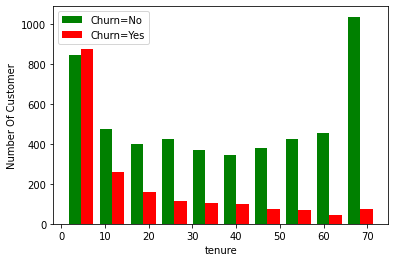

In [ ]:
tenure_churn_no=df1[df1['Churn']=='No'].tenure
tenure_churn_yes=df1[df1['Churn']=='Yes'].tenure

plt.hist([tenure_churn_no,tenure_churn_yes],color=['green','red'],label=['Churn=No','Churn=Yes'])
plt.legend()
plt.xlabel('tenure')
plt.ylabel('Number Of Customer')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Number Of Customer')

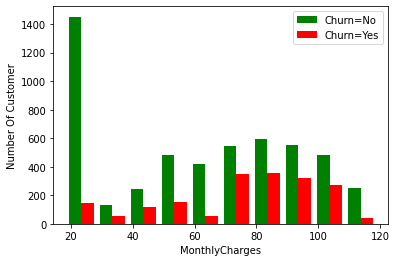

In [ ]:
MonthlyCharges_churn_no=df1[df1['Churn']=='No'].MonthlyCharges
MonthlyCharges_churn_yes=df1[df1['Churn']=='Yes'].MonthlyCharges

plt.hist([MonthlyCharges_churn_no,MonthlyCharges_churn_yes],color=['green','red'],label=['Churn=No','Churn=Yes'])
plt.legend()
plt.xlabel('MonthlyCharges')
plt.ylabel('Number Of Customer')

Unique values

In [ ]:
def unique_col_values(df):
  for i in df.columns:
    if df[i].dtype=='object':
      print(f'unique values of column \'{i}\' are : ',df[i].unique())
  

In [ ]:
unique_col_values(df1)

unique values of column 'gender' are :  ['Female' 'Male']
unique values of column 'Partner' are :  ['Yes' 'No']
unique values of column 'Dependents' are :  ['No' 'Yes']
unique values of column 'PhoneService' are :  ['No' 'Yes']
unique values of column 'MultipleLines' are :  ['No phone service' 'No' 'Yes']
unique values of column 'InternetService' are :  ['DSL' 'Fiber optic' 'No']
unique values of column 'OnlineSecurity' are :  ['No' 'Yes' 'No internet service']
unique values of column 'OnlineBackup' are :  ['Yes' 'No' 'No internet service']
unique values of column 'DeviceProtection' are :  ['No' 'Yes' 'No internet service']
unique values of column 'TechSupport' are :  ['No' 'Yes' 'No internet service']
unique values of column 'StreamingTV' are :  ['No' 'Yes' 'No internet service']
unique values of column 'StreamingMovies' are :  ['No' 'Yes' 'No internet service']
unique values of column 'Contract' are :  ['Month-to-month' 'One year' 'Two year']
unique values of column 'PaperlessBilling

In [ ]:
yes_no_col=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for i in yes_no_col:
  df1[i]=df[i].replace({'Yes':1,'No':0})
df1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,No phone service,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [ ]:
df1['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
#replaced categories with the numeric value
df1['gender']=df1['gender'].replace({'Female':1,'Male':0})
df1['MultipleLines']=df1['MultipleLines'].replace('No phone service',0)
df1=df1.replace('No internet service',0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])


In [ ]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [ ]:
df2.shape

(7032, 27)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

In [ ]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4910,1,0,0,0,30,1,0,1,1,1,1,1,1,0,85.35,2530.40,1,1,0,0,0,1,0,1,0,0,0
6208,0,0,1,0,61,1,1,1,1,1,1,0,1,1,80.80,4860.85,0,1,0,0,0,0,1,1,0,0,0
4791,0,0,1,0,3,1,0,0,0,0,0,0,0,0,20.00,49.65,0,0,0,1,1,0,0,1,0,0,0
473,0,0,1,0,24,1,0,1,0,0,1,0,0,0,53.60,1315.35,0,1,0,0,1,0,0,0,0,0,1
2536,0,0,0,0,25,1,1,0,0,0,0,0,0,0,25.30,676.35,1,0,0,1,0,1,0,1,0,0,0


Normalize the data into one scale

In [ ]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])
df2



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,1,1,1,1,0.662189,0.227521,0,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,0,1,1,1,0.845274,0.847461,0,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,0,0,0,1,0.112935,0.037809,0,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,0,0,0,1,0.558706,0.033210,1,0,1,0,1,0,0,0,0,0,1


In [ ]:
df2.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6468,0,0,1,0,0.183099,1,0,0,0,0,0,0,0,0,0.262189,0.071827,0,1,0,0,0,1,0,0,0,1,0


Separate the Data into x and y then train and test.

In [ ]:
x=df2.drop('Churn',axis=1)  #input
y=df2['Churn']              #output

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=272) 
#splitted train and test data into 80:20 



In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 26)
(1407, 26)
(5625,)
(1407,)


Model Builiding

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model1=keras.Sequential([
                        keras.layers.Dense(20,input_shape=(26,),activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid'),
])

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model1.fit(x_train,y_train,epochs=5,batch_size=8)


Epoch 1/5
704/704 [==============================] - 2s 2ms/step - loss: 0.4732 - accuracy: 0.7687
Epoch 2/5
704/704 [==============================] - 1s 2ms/step - loss: 0.4189 - accuracy: 0.7988
Epoch 3/5
704/704 [==============================] - 1s 2ms/step - loss: 0.4172 - accuracy: 0.8039
Epoch 4/5
704/704 [==============================] - 1s 2ms/step - loss: 0.4151 - accuracy: 0.8043
Epoch 5/5
704/704 [==============================] - 1s 2ms/step - loss: 0.4149 - accuracy: 0.8057


Adding One more  hidden Layer

In [ ]:
model2=keras.Sequential([
                        keras.layers.Dense(20,input_shape=(26,),activation='relu'),
                        keras.layers.Dense(10,activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid'),
])

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.fit(x_train,y_train,epochs=5,batch_size=8)

Epoch 1/5
704/704 [==============================] - 2s 2ms/step - loss: 0.4692 - accuracy: 0.7740
Epoch 2/5
704/704 [==============================] - 2s 2ms/step - loss: 0.4256 - accuracy: 0.7963
Epoch 3/5
704/704 [==============================] - 2s 2ms/step - loss: 0.4180 - accuracy: 0.8020
Epoch 4/5
704/704 [==============================] - 1s 2ms/step - loss: 0.4162 - accuracy: 0.8037
Epoch 5/5
704/704 [==============================] - 1s 2ms/step - loss: 0.4126 - accuracy: 0.8098


as we can see there is not more effect in accuracy when we are increaing hidden layers. So just we will try to increase in epoches or batches.

In [ ]:
model1.evaluate(x_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.7903


[0.42586520314216614, 0.7903340458869934]

In [ ]:
model2.evaluate(x_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.7967


[0.42581531405448914, 0.796730637550354]

In [ ]:
y_pred=model2.predict(x_test)
y_pred

array([[0.05716056],
       [0.03891033],
       [0.64110094],
       ...,
       [0.75957227],
       [0.07579014],
       [0.2658664 ]], dtype=float32)

In [ ]:
#will convert into one dimension
y_predict=[]
for i in y_pred:
  if i>0.5:
    y_predict.append(1)
  else:
    y_predict.append(0)

In [ ]:
y_predict[:5]

[0, 0, 1, 0, 1]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))
cm=confusion_matrix(y_test,y_predict)
print(cm)


0.7967306325515281
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1035
           1       0.63      0.57      0.60       372

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407

[[909 126]
 [160 212]]


Visualize confusion matrix

Text(33.0, 0.5, 'True')

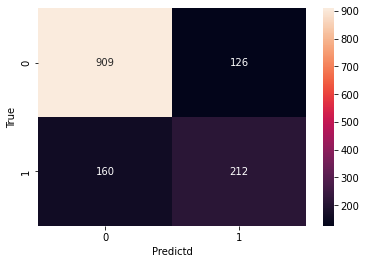

In [ ]:
s ns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predictd')
plt.ylabel('True')